# Credit Worthiness Prediction
The objective of this exercise is to build a machine model, using historical banking data that will help the bank employees to determine appropriate candidature for the loan approval.

# Importing Libraries

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [338]:
# Reading the Excel file and storing it in the 'data' DataFrame
data = pd.read_excel(r"C:\Users\Ssekhar\Downloads\LP-1\Consumer creditworthiness train data.xlsx")

# Displaying the first few rows of the DataFrame
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [339]:
data.shape

(521, 13)

The data sets have 521 rows and 13 columns in train dataset.

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


The dataset has null values in Gender, Married, Dependents, Self Employed, Loan_Amount_Term, Credit_History Columns

In [341]:
data.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,521.000000,5.210000e+02,5.210000e+02,5.210000e+02,507.000000,478.000000
mean,547517.817658,1.229406e+06,3.495994e+05,2.797044e+05,343.266272,0.847280
std,261344.261339,1.449755e+06,4.824296e+05,1.712505e+05,63.607974,0.360094
min,101559.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,314492.000000,6.468750e+05,0.000000e+00,1.960000e+05,360.000000,1.000000
50%,543412.000000,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000
75%,783776.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000
max,998791.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000


- The Applicant income ranges from 33,750 to 1,82,25,000 
- The Coaapplicant incom ranges from 0 to 45,00,000
- The Loan amount ranges from 0 to 14,00,000
- The Loan amount term ranges from 12 to 480 months

# Univariate Analysis

In [342]:
data['Loan_Status'].value_counts()

Y    358
N    163
Name: Loan_Status, dtype: int64

In [343]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.68714
N    0.31286
Name: Loan_Status, dtype: float64

<AxesSubplot:>

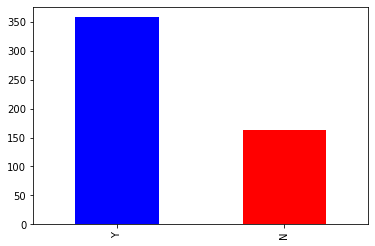

In [9]:
# Calculate the counts of each unique value in the 'Loan_Status' column and create a bar plot
data['Loan_Status'].value_counts().plot.bar(color=('blue', 'red'))

# Display the plot

The loan of 358 (around 68.71%) people out of 521 were approved.


* Categorical features: These features have categories (Loan_Status, Gender, Married, Self_Employed, Credit_History, Education, Property_Area)

* Numerical features: These features have numerical values (Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

## Categorical Independent Variable 

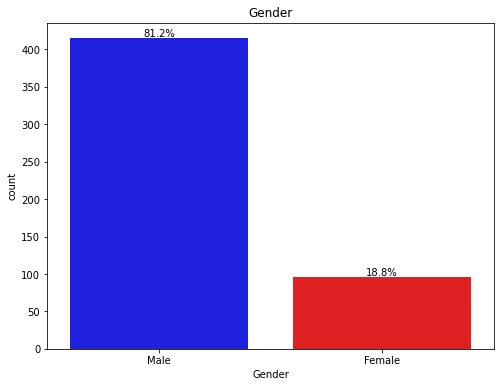

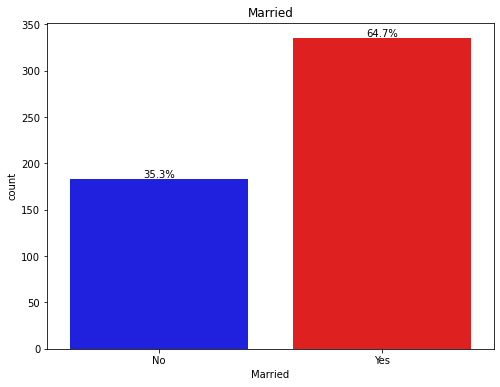

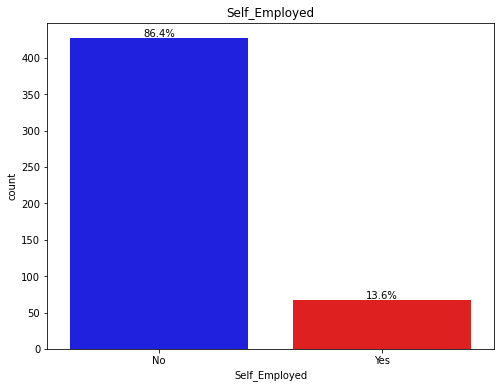

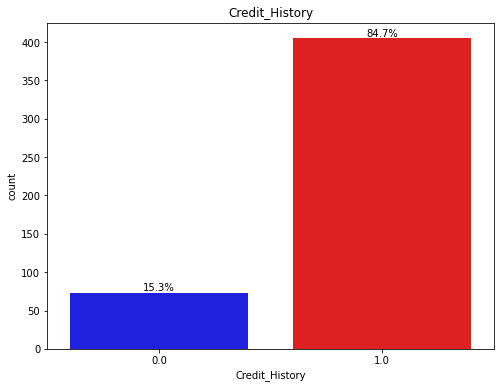

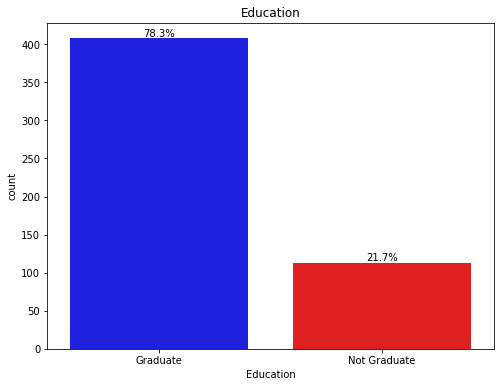

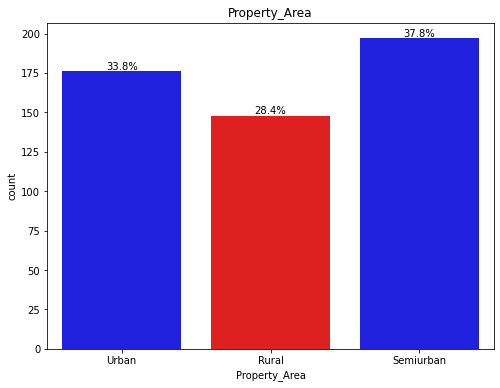

In [3]:
# Define a function to add percentage labels to the bars
def add_percentage_labels(ax, total_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points', fontsize=10, color='black')

# List of columns for which you want to create bar plots
columns_to_plot = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education', 'Property_Area']

# Plotting bar plots with percentage labels using Seaborn
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=data, palette=['blue', 'red'])
    plt.title(column)
    total_count = len(data[column].dropna())  # Total non-null values in the column
    add_percentage_labels(ax, total_count)
    plt.show()

Following inferences can be made from the above bar plots:

* 81.2% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 14% applicants in the dataset are self employed.
* Around 85% applicants have their credit history available.
* Around 80% of the applicants are Graduate.
* Most of the applicants are having property in Semiurban area.

## Numerical Independent Variable 

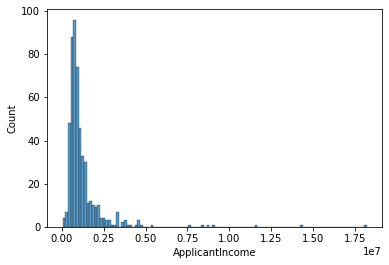

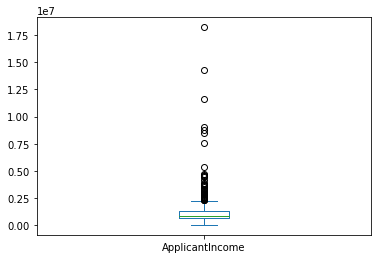

In [7]:
# Create a distribution plot (histogram and kernel density estimate) for the 'ApplicantIncome' column
sns.histplot(data['ApplicantIncome'])

# Display the plot
plt.show()

# Create a box plot for the 'ApplicantIncome' column
data['ApplicantIncome'].plot.box()

# Display the plot
plt.show()

* It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

* The boxplot confirms the presence of a lot of outliers/extreme values. 

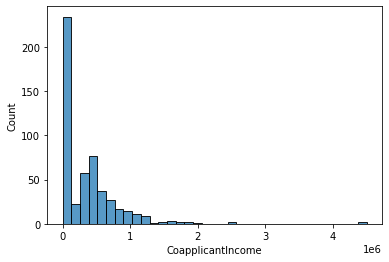

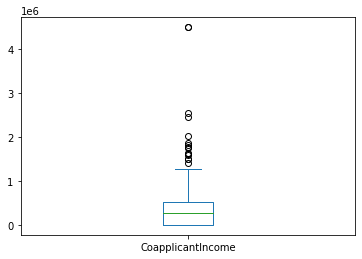

In [8]:
# Create a histogram plot for the 'CoapplicantIncome' column using Seaborn
sns.histplot(data['CoapplicantIncome'])

# Display the plot
plt.show()

# Create a box plot for the 'CoapplicantIncome' column
data['CoapplicantIncome'].plot.box()

# Display the plot
plt.show()

* CoapplicantIncome is not normally distributed.
* We also see a lot of outliers in the coapplicant's income 

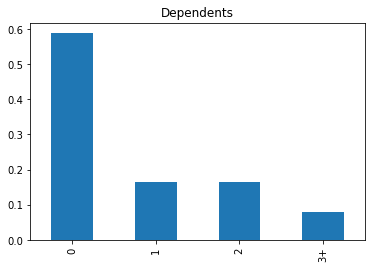

In [10]:
# Calculate the normalized counts of each unique value in the 'Dependents' column and create a bar plot
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

# Display the plot
plt.show()

* Most of the applicants don't have any dependents.

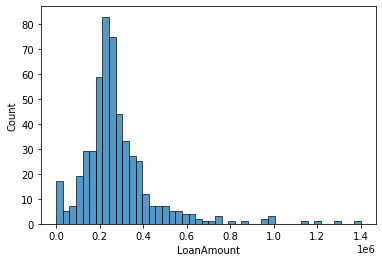

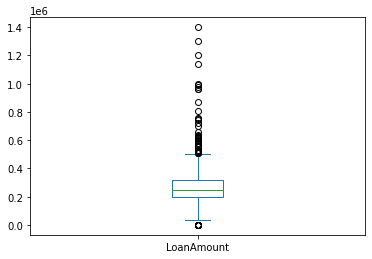

In [12]:
# Create a distribution plot (histogram and kernel density estimate) for the 'LoanAmount' column using Seaborn
sns.histplot(data['LoanAmount'])

# Display the distribution plot
plt.show()

# Create a box plot for the 'LoanAmount' column
data['LoanAmount'].plot.box()

# Display the box plot
plt.show()

* Majority of the data are towards letf side of distribution. 
* Lot of outliers in the Loan amount feature

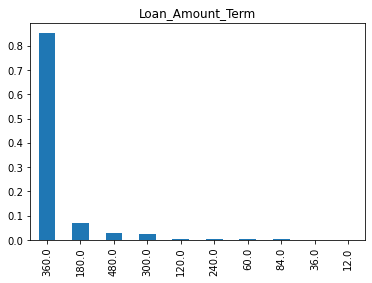

In [13]:
# Calculate the normalized counts of each unique value in the 'Loan_Amount_Term' column and create a bar plot
data['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term')

# Display the plot
plt.show()

Majority of applicants have applied loan of 360 months term


### Data Quality Checks
* Completeness: The dataset has null values in Gender (10), Married (03), Dependents (13), Self Employed (27), Loan_Amount_Term (27), Credit_History (43). Missing values can be imputed.
* Consistency: Datatype of the Dependents feature is integer hoewever it has text ' 3+'. The text can be assumed as interger 3 for that category.
* Validity: Many rows of CoapplicantIncome has filled with 0s which shows the absence of copplicant's income value not income as 0. Similarly Loan amount column has also '0's which again is not a valid input.

## Bivariate Analysis
Let's have a look on hypotheses that we generated earlier:

* Gender, Marital status, Number of dependents, Property area should have less impact on Loan approval
* Good Education should have more chances of loan approval
* Self-employed should have lesser chances of loan approval
* Applicants with high incomes should have more chances of loan approval
* Applicant with Co applicant should have more chances of loan approval
* If the loan amount is less, the chances of loan approval should be high
* If the loan tenure is less, the chances of loan approval should be high
* Applicants who have repaid their previous debts (credit history) should have higher chances of loan approval

Let's try to test the above-mentioned hypotheses using bivariate analysis

### Relation between Categorical Independent Variables and Target Variable

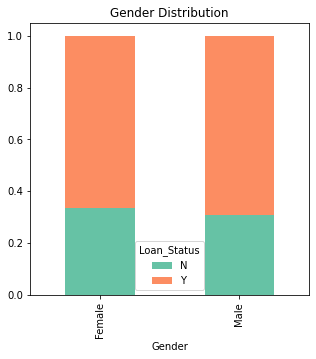

In [27]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Gender' and 'Loan_Status' columns
Gender = pd.crosstab(data['Gender'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Gender_percentage = Gender.div(Gender.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Gender_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Gender Distribution")

# Display the plot
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans. This supports our hypotheses on Gender vs Loan_Approval

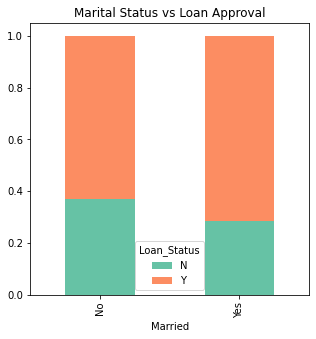

In [28]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Married' and 'Loan_Status' columns
Married = pd.crosstab(data['Married'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Married_percentage = Married.div(Married.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Married_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Marital Status vs Loan Approval")

# Display the plot
plt.show()

The portion of married applicants is higher for approved loans. 

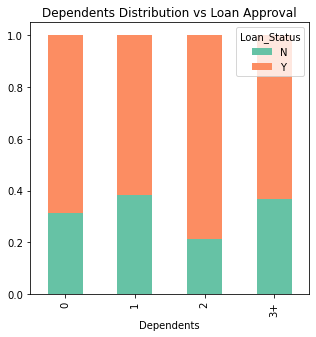

In [29]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Dependents' and 'Loan_Status' columns
Dependents = pd.crosstab(data['Dependents'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Dependents_percentage = Dependents.div(Dependents.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Dependents_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Dependents Distribution vs Loan Approval")

# Display the plot
plt.show()

 Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

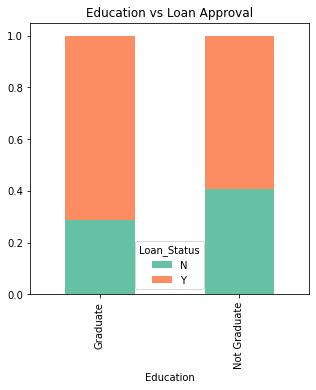

In [30]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Education' and 'Loan_Status' columns
Education = pd.crosstab(data['Education'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Education_percentage = Education.div(Education.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Education_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Education vs Loan Approval")

# Display the plot
plt.show()

The portion of Graduates have higher loan approvals than non graduates. This supports our hypothesis.

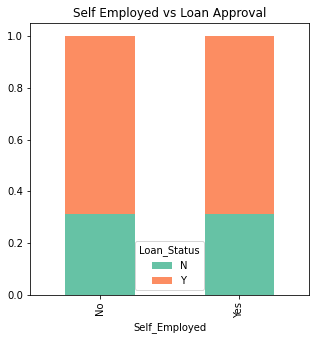

In [31]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Self_Employed' and 'Loan_Status' columns
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Self_Employed_percentage = Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Self_Employed_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Self Employed vs Loan Approval")

# Display the plot
plt.show()

There is nothing significant we can infer from Self_Employed vs Loan_Status plot. This contradicts our earlier hypothesis


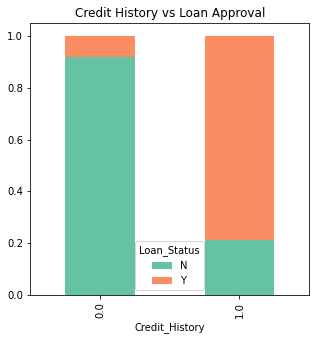

In [32]:
# Set a custom color palette
sns.set_palette("Set2")

# Calculate the cross-tabulation between 'Credit_History' and 'Loan_Status' columns
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Credit_History_percentage = Credit_History.div(Credit_History.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Credit_History_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Credit History vs Loan Approval")

# Display the plot
plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved. This supports our hypothesis

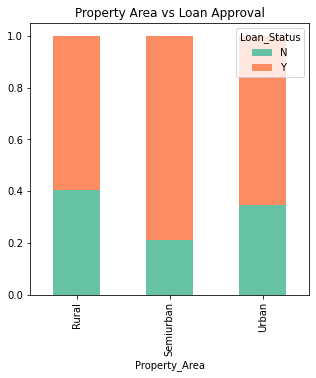

In [33]:
# Set a custom color palette
sns.set_palette("Set2") 

# Calculate the cross-tabulation between 'Property_Area' and 'Loan_Status' columns
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Property_Area_percentage = Property_Area.div(Property_Area.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Property_Area_percentage.plot(kind="bar", stacked=True, figsize=(5, 5))

# Set the title for the plot
plt.title("Property Area vs Loan Approval")

# Display the plot
plt.show()

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

### Relation between Numerical Independent Variable and Target Variable

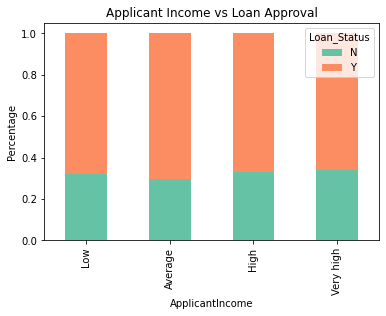

In [34]:
# Define the bins and corresponding labels
bins = [0, 500000, 1000000, 2000000, 18225000]
group = ['Low', 'Average', 'High', 'Very high']

# Create a new column 'Income_bin' by categorizing 'ApplicantIncome' using the defined bins and labels
data['Income_bin'] = pd.cut(data['ApplicantIncome'], bins, labels=group)

# Calculate the cross-tabulation between 'Income_bin' and 'Loan_Status' columns
Income_bin = pd.crosstab(data['Income_bin'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Income_bin_percentage = Income_bin.div(Income_bin.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Income_bin_percentage.plot(kind="bar", stacked=True)

# Set the x-axis label
plt.xlabel('ApplicantIncome')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title for the plot
plt.title("Applicant Income vs Loan Approval")

# Display the plot
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

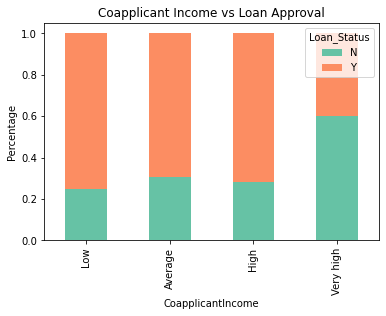

In [35]:
# Define the bins and corresponding labels for CoapplicantIncome
bins = [0, 500000, 1000000, 2000000, 5000000]
group = ['Low', 'Average', 'High', 'Very high']

# Create a new column 'Coapplicant_Income_bin' by categorizing 'CoapplicantIncome' using the defined bins and labels
data['Coapplicant_Income_bin'] = pd.cut(data['CoapplicantIncome'], bins, labels=group)

# Calculate the cross-tabulation between 'Coapplicant_Income_bin' and 'Loan_Status' columns
Coapplicant_Income_bin = pd.crosstab(data['Coapplicant_Income_bin'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Coapplicant_Income_bin_percentage = Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Coapplicant_Income_bin_percentage.plot(kind="bar", stacked=True)

# Set the x-axis label
plt.xlabel('CoapplicantIncome')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title for the plot
plt.title("Coapplicant Income vs Loan Approval")

# Display the plot
plt.show()


It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.


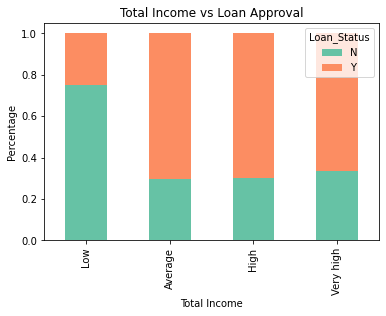

In [36]:
# Calculate the total income by summing 'ApplicantIncome' and 'CoapplicantIncome'
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Define the bins and corresponding labels for Total Income
bins = [0, 500000, 1000000, 2000000, 19225000]
group = ['Low', 'Average', 'High', 'Very high']

# Create a new column 'Total_Income_bin' by categorizing 'Total_Income' using the defined bins and labels
data['Total_Income_bin'] = pd.cut(data['Total_Income'], bins, labels=group)

# Calculate the cross-tabulation between 'Total_Income_bin' and 'Loan_Status' columns
Total_Income_bin = pd.crosstab(data['Total_Income_bin'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
Total_Income_bin_percentage = Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
Total_Income_bin_percentage.plot(kind="bar", stacked=True)

# Set the x-axis label
plt.xlabel('Total Income')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title for the plot
plt.title("Total Income vs Loan Approval")

# Display the plot
plt.show()

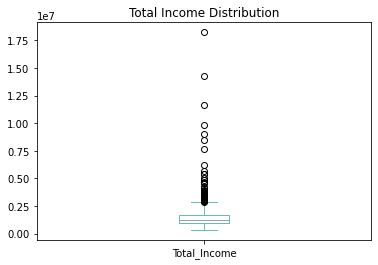

In [37]:
# Create a box plot to visualize the distribution of 'Total_Income'
data['Total_Income'].plot.box()

# Set the title for the plot
plt.title("Total Income Distribution")

# Display the plot
plt.show()


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

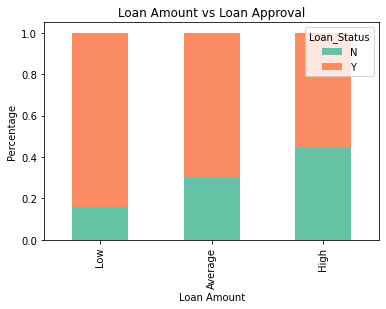

In [38]:
# Define bins and labels for Loan Amount
bins = [0, 100000, 500000, 1500000]
group = ['Low', 'Average', 'High']

# Create a new column 'LoanAmount_bin' by categorizing 'LoanAmount' using the defined bins and labels
data['LoanAmount_bin'] = pd.cut(data['LoanAmount'], bins, labels=group)

# Calculate the cross-tabulation between 'LoanAmount_bin' and 'Loan_Status' columns
LoanAmount_bin = pd.crosstab(data['LoanAmount_bin'], data['Loan_Status'])

# Calculate the percentage distribution by dividing the counts by the sum of each row
LoanAmount_bin_percentage = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0)

# Create a stacked bar plot using the calculated percentage distribution
LoanAmount_bin_percentage.plot(kind="bar", stacked=True)

# Set the x-axis label
plt.xlabel('Loan Amount')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title for the plot
plt.title("Loan Amount vs Loan Approval")

# Display the plot
plt.show()

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

### Correlation between all the numerical variables

We will use the heat map to visualize the correlation. The variables with darker color means their correlation is more.

Before proceeding to heatmap Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [363]:
# Drop the new variable of bins
data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

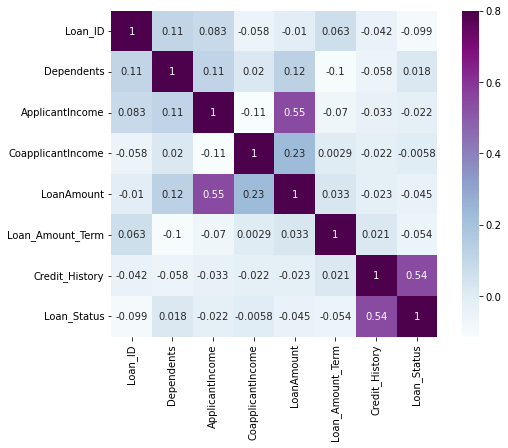

In [364]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

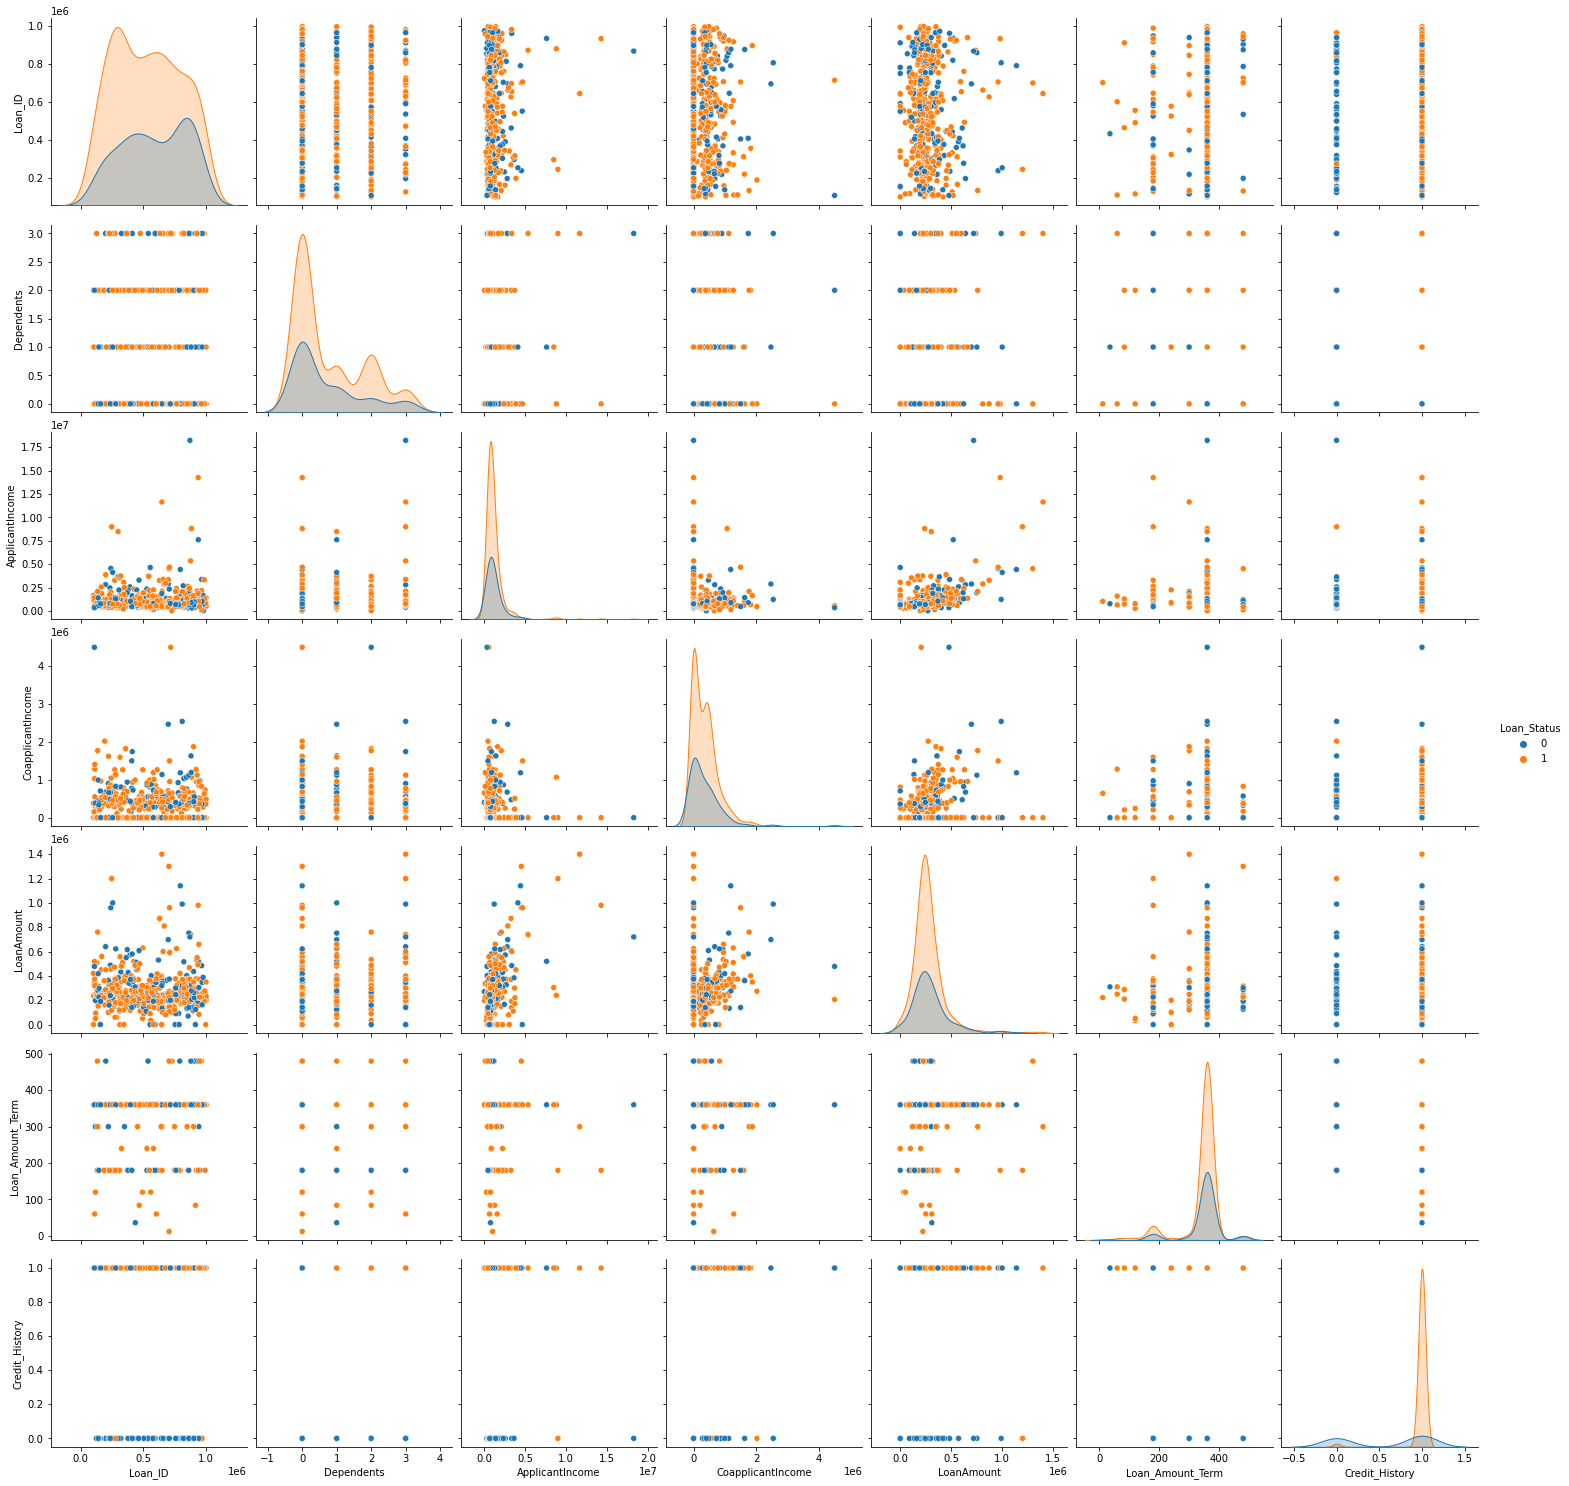

In [365]:
sns.pairplot(data, hue = "Loan_Status", size=3)

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

(LoanAmount is also correlated with CoapplicantIncome).

## Missing value imputation and Outlier treatment



In [366]:
# Checking the missing values
missing_values_sum = data.isnull().sum()
print(missing_values_sum)
missing_values_percent = data.isnull().mean()*100
print(missing_values_percent)

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0.000000
Gender               1.919386
Married              0.575816
Dependents           2.495202
Education            0.000000
Self_Employed        5.182342
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.687140
Credit_History       8.253359
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


<AxesSubplot:>

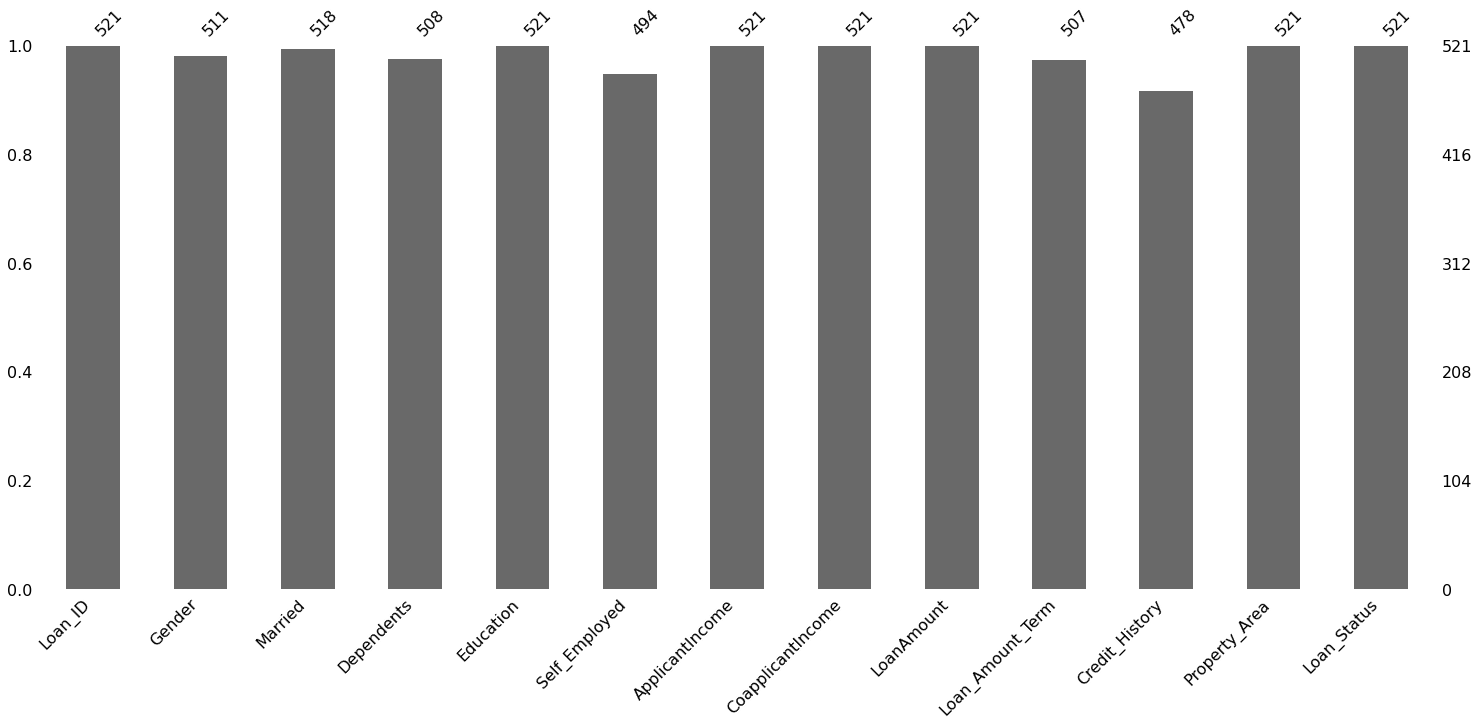

In [367]:
msno.bar(data)

<AxesSubplot:>

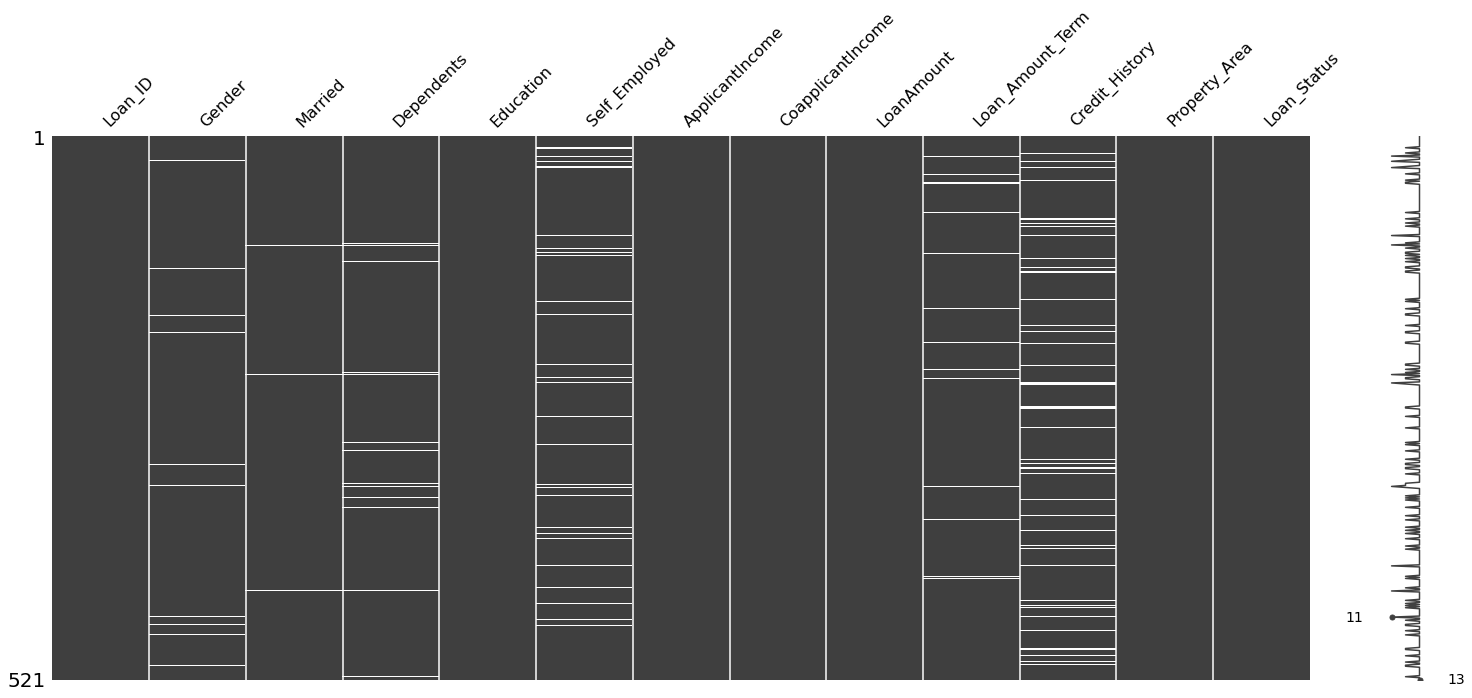

In [368]:
msno.matrix(data)

<AxesSubplot:>

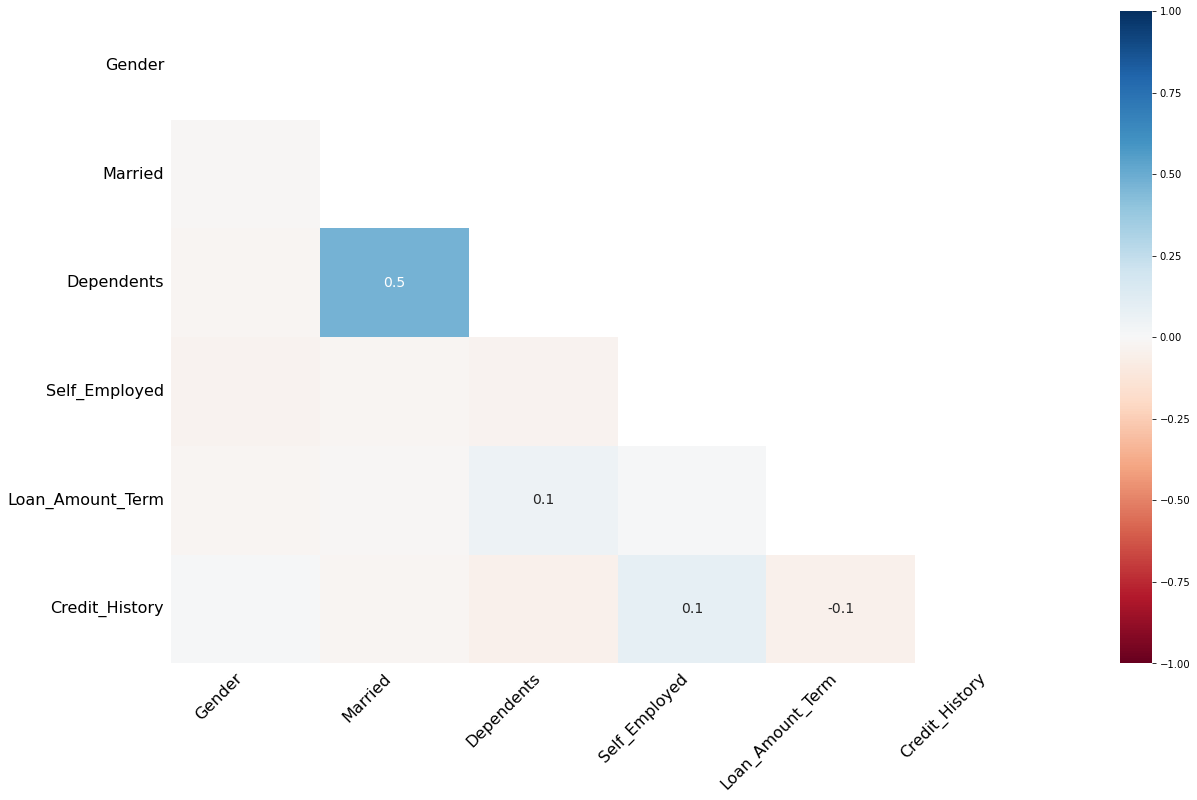

In [369]:
msno.heatmap(data)

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [370]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

Earlier we have seen that in Loan_Amount_Term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [371]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

Loan amount can not be 0. This may be assumed as missing value.
We will use the median to fill the null values as earlier we saw that the loan amount has outliers 

In [372]:
data['LoanAmount'].replace(0,data['LoanAmount'].median(), inplace=True)
(data['LoanAmount']==0).value_counts()

False    521
Name: LoanAmount, dtype: int64

In [373]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now The dataset has no missing values

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 
We must take steps to treat outliers from our data sets. Log transformation reduces the impact of outliers and change a right skewed distribution to normal distribution

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

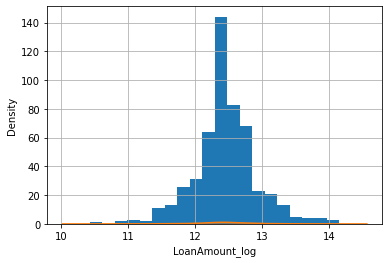

In [374]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)
sns.distplot(data['LoanAmount_log'])

## Feature Engineering

We will create the following new features based on the buisness logic:

*__Total Income__ - As discussed earlier the coapplicant column has many 0s which can be interpreted as absence of coapplicant in the loan application. Hence, We can create a new feature combining applicant and coapplicant's income. Lets create a new feature total income

*__EMI__- EMI is the monthly amount to be paid by the applicant to repay the loan.Idea behind creation of this feature is that, Many applicants have choosen Loan amount term 360 months irrespective of their Loan amount. To categorise  applicant based on their loan amount and loan term we need this feature. people who have high EMI’s might find it difficult to pay back the loan. 
Assuming the loan amount as sum of pricipal and intereat on loan,We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.


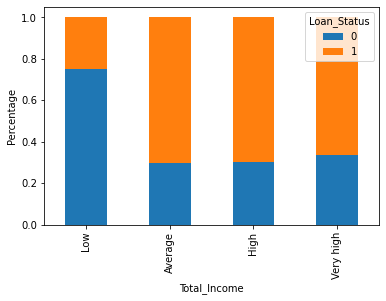

In [375]:
# Total_Income feature
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,500000,1000000,2000000,19225000]
group=['Low','Average','High','Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')


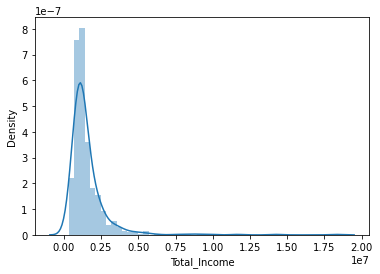

In [376]:
sns.distplot(data['Total_Income'])
plt.show()

we can see the distribution is not normal. Similar log transformation can treat the outliers

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

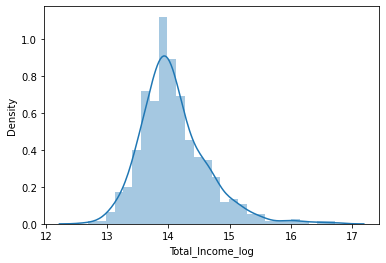

In [377]:
data['Total_Income_log'] = np.log(data['Total_Income'])
sns.distplot(data['Total_Income_log'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

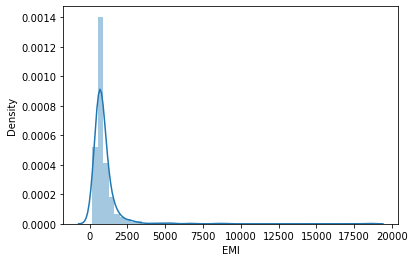

In [378]:
# EMI feature
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']
sns.distplot(data['EMI'])

<AxesSubplot:xlabel='EMI_log', ylabel='Density'>

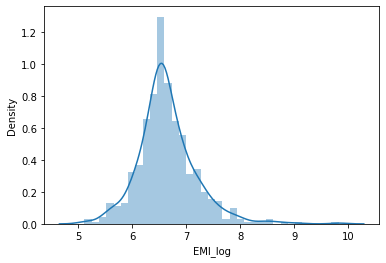

In [379]:
data['EMI_log'] = np.log(data['EMI'])
sns.distplot(data['EMI_log'])

Now lets save the file and download it for visualization in BI tool

In [380]:
data['Loan_Status'].replace(0, 'N',inplace=True)
data['Loan_Status'].replace(1, 'Y',inplace=True)
data.describe()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log
count,521.000000,521.000000,5.210000e+02,5.210000e+02,5.210000e+02,521.000000,521.000000,521.000000,5.210000e+02,521.000000,521.000000,521.000000
mean,547517.817658,0.719770,1.229406e+06,3.495994e+05,2.878618e+05,343.715931,0.859885,12.452500,1.579006e+06,14.083869,931.483716,6.643183
std,261344.261339,0.999121,1.449755e+06,4.824296e+05,1.634969e+05,62.804305,0.347440,0.475984,1.474995e+06,0.544330,1055.929267,0.541221
min,101559.000000,0.000000,3.375000e+04,0.000000e+00,3.400000e+04,12.000000,0.000000,10.434116,3.244500e+05,12.689887,166.666667,5.115996
25%,314492.000000,0.000000,6.468750e+05,0.000000e+00,2.000000e+05,360.000000,1.000000,12.206073,9.373500e+05,13.750812,572.222222,6.349527
50%,543412.000000,0.000000,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000,12.429216,1.199925e+06,13.997770,716.666667,6.574611
75%,783776.000000,1.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000,12.676076,1.696950e+06,14.344343,988.888889,6.896582
max,998791.000000,3.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000,14.151983,1.822500e+07,16.718305,18500.000000,9.825526


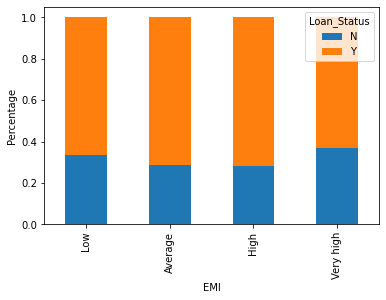

In [381]:
bins=[0,500,750,1000,20000]
group=['Low','Average','High','Very high']
data['EMI_bin']=pd.cut(data['EMI'],bins,labels=group)
EMI_bin=pd.crosstab(data['EMI_bin'],data['Loan_Status'])
EMI_bin.div(EMI_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('EMI')
P=plt.ylabel('Percentage')

This shows that the newly created feature has no siginifacant impact. Lets check the same through correlation test

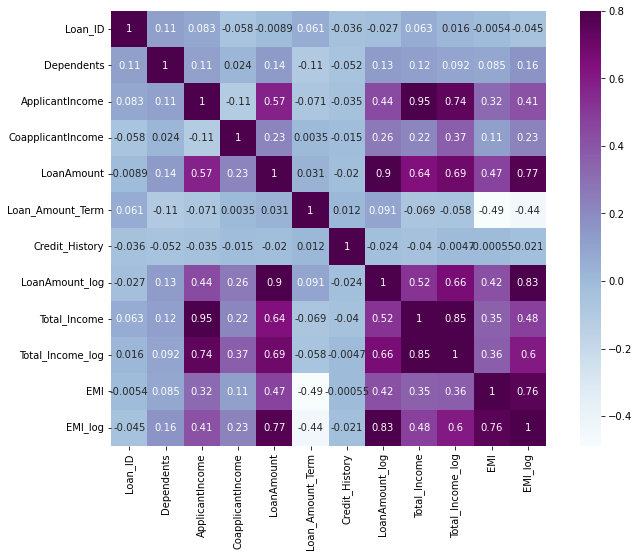

In [382]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)
plt.savefig('D:\Datascience\Data Science Project Internships\LP-1\heatmap.png')

Lets drop the redundant variable that do not have any effect on the loan status.

In [383]:
data=data.drop('Loan_ID',axis=1)

In [384]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Total_Income'], axis=1)

In [385]:
data=data.drop(['Total_Income_bin','EMI_bin','EMI','EMI_log'], axis=1)

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            521 non-null    object 
 1   Married           521 non-null    object 
 2   Dependents        521 non-null    float64
 3   Education         521 non-null    object 
 4   Self_Employed     521 non-null    object 
 5   Loan_Amount_Term  521 non-null    float64
 6   Credit_History    521 non-null    float64
 7   Property_Area     521 non-null    object 
 8   Loan_Status       521 non-null    object 
 9   LoanAmount_log    521 non-null    float64
 10  Total_Income_log  521 non-null    float64
dtypes: float64(5), object(6)
memory usage: 44.9+ KB


In [387]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    le =LabelEncoder()
    data[col] = le.fit_transform(data[col])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,1,0,0,0,0,8,1,2,1,74,284
1,1,1,1,0,0,8,1,0,0,77,295
2,1,1,0,0,1,8,1,2,1,22,36
3,1,1,0,1,0,8,1,2,1,69,208
4,1,0,0,0,0,8,1,2,1,90,289


In [388]:
from sklearn.feature_selection import chi2
X = data.drop(columns = ['Loan_Status'], axis =1)
y = data['Loan_Status']
chi_scores =chi2(X,y)
chi_scores

(array([4.22805231e-02, 1.58940145e+00, 2.31758074e-01, 4.66624199e+00,
        1.02309169e-04, 1.32527141e-01, 2.02492570e+01, 5.10228258e-01,
        4.47927797e+01, 4.52835195e+00]),
 array([8.37085970e-01, 2.07411671e-01, 6.30223296e-01, 3.07611675e-02,
        9.91929695e-01, 7.15826069e-01, 6.79798586e-06, 4.75040062e-01,
        2.19028876e-11, 3.33377080e-02]))

<AxesSubplot:>

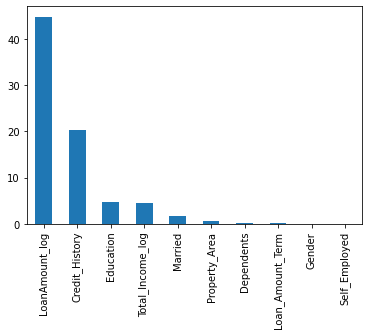

In [389]:
chi_values = pd.Series(chi_scores[0], index= X.columns)
chi_values.sort_values(ascending =False, inplace = True)
chi_values.plot.bar()

<AxesSubplot:>

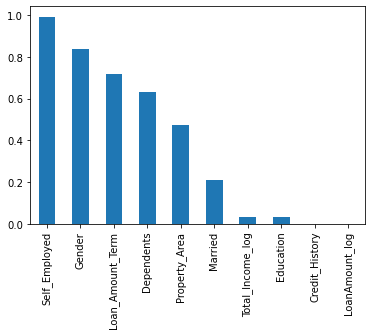

In [390]:
p_values = pd.Series(chi_scores[1], index= X.columns)
p_values.sort_values(ascending =False, inplace = True)
p_values.plot.bar()

P value > 0.5 are having less impact on target variable. These features are Self_Employed, Gender and Loan_Amount_Term Dependent

### Feature Importance

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()

# Fit the model to the data
LOGC.fit(X, y)

# Get the coefficients representing feature importance
features = LOGC.coef_[0]

# Get the column names of the features
Columns = list(X.columns)

# Print out feature importance values
for i, j in enumerate(features):
    print(Columns[i], "->", j)

# Create a bar plot to visualize the feature importance values
plt.figure(figsize=(16, 5))
plt.title(label="LOGC")
plt.bar(range(len(features)), features) 
plt.xticks(range(len(features)), Columns, rotation='vertical')  
plt.show()


Feature importance by Logistic Regression:->



NameError: name 'X' is not defined

Feature importance by Random Forest:->

Gender -> 0.02309755962563549
Married -> 0.026451177002642035
Dependents -> 0.056580658092933715
Education -> 0.023867352390212104
Self_Employed -> 0.02184595092096405
Loan_Amount_Term -> 0.037030588777747384
Credit_History -> 0.25310591400464594
Property_Area -> 0.055184767867689596
LoanAmount_log -> 0.23909091626359846
Total_Income_log -> 0.26374511505393117


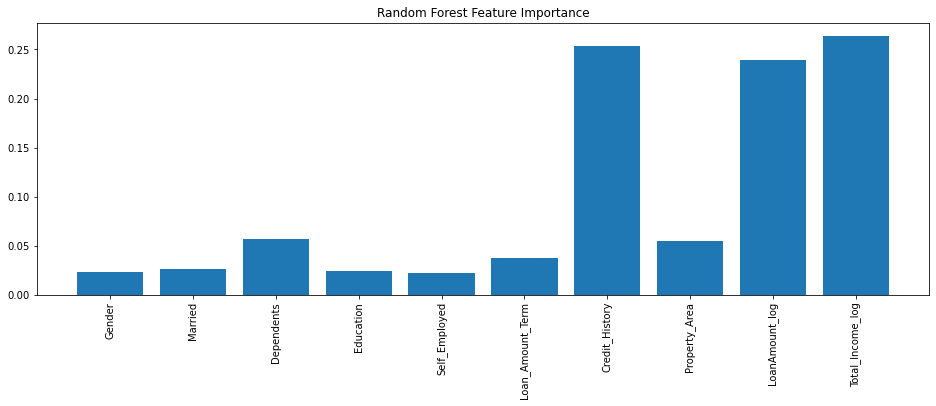

In [392]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X, y)
features = RF.feature_importances_
Columns = list(X.columns)

for i, j in enumerate(features):
    print(Columns[i], "->", j)

plt.figure(figsize=(16, 5))
plt.title(label="Random Forest Feature Importance")
plt.bar(range(len(features)), features)
plt.xticks(range(len(features)), Columns, rotation='vertical')
plt.show()


Lets drop features having negligible impacts

In [393]:
X=X.drop(['Self_Employed', 'Gender','Loan_Amount_Term','Dependents'], axis=1)

In [394]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Married           521 non-null    int32
 1   Education         521 non-null    int32
 2   Credit_History    521 non-null    int64
 3   Property_Area     521 non-null    int32
 4   LoanAmount_log    521 non-null    int64
 5   Total_Income_log  521 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 18.4 KB


In [395]:
X.describe()

,Married,Education,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,0.648752,0.216891,0.859885,1.053743,79.481766,238.809981
std,0.477819,0.412524,0.347440,0.787517,40.941564,136.441212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,49.000000,120.000000
50%,1.000000,0.000000,1.000000,1.000000,74.000000,240.000000
75%,1.000000,0.000000,1.000000,2.000000,104.000000,355.000000
max,1.000000,1.000000,1.000000,2.000000,183.000000,476.000000


In [396]:
# Save the dataframe to a CSV file
data.to_csv('Credit Worthiness Cleaned Data.csv', index=False)

Now we will train the model on training dataset and make predictions for the test dataset.

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
### Train-Test Split

In [397]:
# import library
from sklearn.model_selection import train_test_split
# split the data into train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((364, 6), (157, 6), (364,), (157,))

### Model Training

In [398]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    model.fit(X_train, y_train)   
    pred_test = model.predict(X_test)
    print("Testing Accuracy_Score is", accuracy_score(pred_test, y_test) * 100)
    
    # K-Fold Stratified Cross Validation:
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    score = cross_val_score(model, X, y, cv=stratified_kfold)
    print("Accuracy using K-Fold Stratified Cross Validation is,", np.mean(score) * 100)


### 1. Logistic Regression

In [399]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Testing Accuracy_Score is 82.16560509554141
Accuracy using K-Fold Stratified Cross Validation is, 80.6117216117216


### 2. DecisionTree

In [400]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Testing Accuracy_Score is 73.88535031847134
Accuracy using K-Fold Stratified Cross Validation is, 69.48901098901099


### 3. Random Forest

In [401]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

Testing Accuracy_Score is 75.15923566878982
Accuracy using K-Fold Stratified Cross Validation is, 74.47985347985347


### 4. XGBoost

In [402]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,X,y)

Testing Accuracy_Score is 73.88535031847134
Accuracy using K-Fold Stratified Cross Validation is, 75.43772893772893


### 5. AdaBoost

In [403]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model,X,y)

Testing Accuracy_Score is 76.43312101910828
Accuracy using K-Fold Stratified Cross Validation is, 77.16483516483517


### 6. KNeighbors

In [404]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
classify(model,X,y)

Testing Accuracy_Score is 68.78980891719745
Accuracy using K-Fold Stratified Cross Validation is, 68.14102564102565


### 7. Naive Bayes

In [405]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model,X,y)

Testing Accuracy_Score is 82.16560509554141
Accuracy using K-Fold Stratified Cross Validation is, 80.41941391941393


### 8. Support Vector Machine

In [406]:
from sklearn import svm
model = svm.SVC(kernel='linear')
classify(model,X,y)

Testing Accuracy_Score is 82.16560509554141
Accuracy using K-Fold Stratified Cross Validation is, 80.41941391941393


### Confusion Matrix

In [407]:
from sklearn.metrics import confusion_matrix

def cf_matrix(model, X, y):
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    cm = confusion_matrix(pred_test, y_test)
    sns.heatmap(cm, annot = True, fmt = 'g')
    # Classification Report
    print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           0       0.34      0.93      0.50        15
           1       0.99      0.81      0.89       142

    accuracy                           0.82       157
   macro avg       0.67      0.87      0.70       157
weighted avg       0.93      0.82      0.85       157



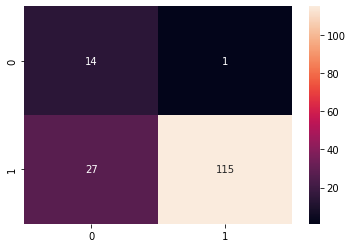

In [408]:
# Logistic Regression
model = LogisticRegression()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        41
           1       0.82      0.82      0.82       116

    accuracy                           0.73       157
   macro avg       0.65      0.65      0.65       157
weighted avg       0.73      0.73      0.73       157



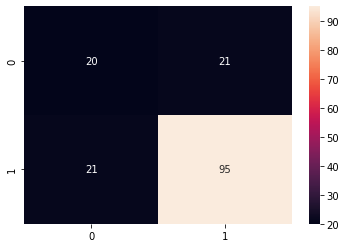

In [409]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.37      0.48      0.42        31
           1       0.86      0.79      0.83       126

    accuracy                           0.73       157
   macro avg       0.61      0.64      0.62       157
weighted avg       0.76      0.73      0.75       157



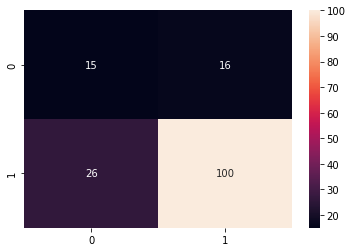

In [410]:
# Random Forest Classifier
model = RandomForestClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.85      0.80      0.83       123

    accuracy                           0.74       157
   macro avg       0.63      0.65      0.64       157
weighted avg       0.76      0.74      0.75       157



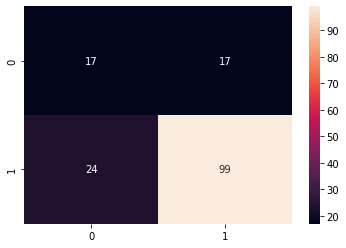

In [411]:
# XG Boost Classifier
model = XGBClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.39      0.57      0.46        28
           1       0.90      0.81      0.85       129

    accuracy                           0.76       157
   macro avg       0.64      0.69      0.66       157
weighted avg       0.81      0.76      0.78       157



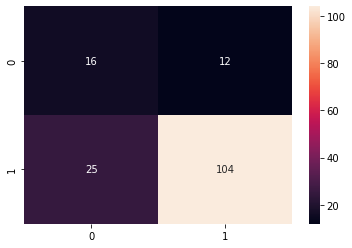

In [412]:
# Ada Boost Classifier
model = AdaBoostClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.07      0.21      0.11        14
           1       0.91      0.73      0.81       143

    accuracy                           0.69       157
   macro avg       0.49      0.47      0.46       157
weighted avg       0.83      0.69      0.75       157



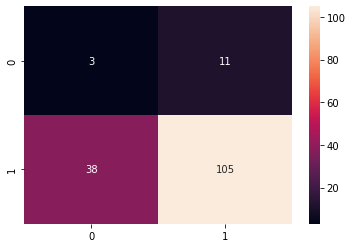

In [413]:
# KNeighbors Classifier
model = KNeighborsClassifier(n_neighbors=20)
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.34      0.93      0.50        15
           1       0.99      0.81      0.89       142

    accuracy                           0.82       157
   macro avg       0.67      0.87      0.70       157
weighted avg       0.93      0.82      0.85       157



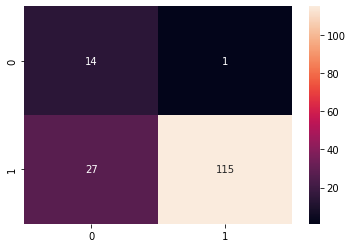

In [414]:
# Naive Bayes Classifier
model = GaussianNB()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.34      0.93      0.50        15
           1       0.99      0.81      0.89       142

    accuracy                           0.82       157
   macro avg       0.67      0.87      0.70       157
weighted avg       0.93      0.82      0.85       157



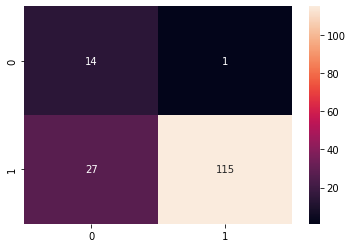

In [415]:
# Support Vector Classifier
model = svm.SVC(kernel='linear')
cf_matrix(model,X,y)

### Hyper Parameter Tuning

In [416]:
from sklearn.model_selection import RandomizedSearchCV

### 1. Logistic Regression

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have prepared your data as X and y

# Define the parameter grid for Logistic Regression
logreg_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create a LogisticRegression instance
logreg_classifier = LogisticRegression()

# Create the RandomizedSearchCV instance
random_search = RandomizedSearchCV(logreg_classifier, param_distributions=logreg_grid, n_iter=20, cv=5, verbose=True)

# Fit the RandomizedSearchCV on your data
random_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [418]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 1}
Best Score: 0.806098901098901


### 2.  Decision Tree

In [419]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for the Decision Tree
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Create the RandomizedSearchCV instance
rs_dt = RandomizedSearchCV(dt_classifier, param_distributions=dt_grid, cv=5, n_iter=20, verbose=True)

# Fit the RandomizedSearchCV on your data
rs_dt.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=True)

In [420]:
print(rs_dt.best_score_)
print(rs_dt.best_params_)

0.7311904761904763
{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}


### 3. Random Forest Classifier

In [421]:
RandomForestClassifier()
rf_grid = {'n_estimators': np.arange(10,1000,10), 'max_features': ['auto','sqrt','log2'], 'max_depth':[None,3,5,10,20,30], 'min_samples_split':[2,5,20,50,100], 'min_samples_leaf':[1,2,5,10]}
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
   

In [422]:
print(rs_rf.best_score_)
print(rs_rf.best_params_)

0.8041758241758241
{'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20}


### 4. XG Boost Classifier

In [423]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
xgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an XGBClassifier instance
xgb_classifier = xgb.XGBClassifier()

# Create the RandomizedSearchCV instance
rs_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=xgb_grid, cv=5, n_iter=20, verbose=True)

# Fit the RandomizedSearchCV on your data
rs_xgb.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [424]:
print(rs_xgb.best_score_)
print(rs_xgb.best_params_)

0.7964835164835165
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


### 5. Adaboost Classifier

In [425]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for AdaBoost
adaboost_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an AdaBoostClassifier instance
adaboost_classifier = AdaBoostClassifier()

# Create the RandomizedSearchCV instance
rs_adaboost = RandomizedSearchCV(adaboost_classifier, param_distributions=adaboost_grid, cv=5, n_iter=20, verbose=True)

# Fit the RandomizedSearchCV on your data
rs_adaboost.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'n_estimators': [50, 100, 200]},
                   verbose=True)

In [426]:
print(rs_adaboost.best_score_)
print(rs_adaboost.best_params_)

0.8041758241758241
{'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME'}


### 6. KNeighbors Classifier

In [427]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for KNN
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier instance
knn_classifier = KNeighborsClassifier()

# Create the RandomizedSearchCV instance
rs_knn = RandomizedSearchCV(knn_classifier, param_distributions=knn_grid, cv=5, n_iter=20, verbose=True)

# Fit the RandomizedSearchCV on your data
rs_knn.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [428]:
print(rs_knn.best_score_)
print(rs_knn.best_params_)

0.6775641025641026
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'algorithm': 'ball_tree'}


### 7. SVC

In [429]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

svc_grid = {'C': [0.25, 0.50, 0.75, 1], "kernel": ["linear", "rbf", "poly", "sigmoid"]}

rs_svc = RandomizedSearchCV(svm.SVC(), param_distributions=svc_grid, cv=5, n_iter=20, verbose=True)
rs_svc.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [430]:
print(rs_svc.best_score_)
print(rs_svc.best_params_)

0.8041758241758241
{'kernel': 'linear', 'C': 0.25}


### Conclusion

Model Accuracy before hper tuning of parameters:

    1. Logistic Regression                80.225
    2. Desicion Tree Classifier           68.701
    3. Random Forest Classifier           74.653
    4. XG Boost Classifier                74.278
    5. Ada Boost Classifier               80.417
    6. KNeighbor Classifier               68.710
    7. Naive Bayes Classifier             80.417
    8. Support Vector Machine Classifier  80.417
  

Model Accuracy after hyper tuning of parameters:

    1. Logistic Regression                80.609
    2. Desicion Tree Classifier           75.809
    3. Random Forest Classifier           80.417
    4. XG Boost Classifier                80.417
    5. Ada Boost Classifier               80.417
    6. KNeighbor Classifier               67.770
    7. Support Vector Machine Classifier  80.417
  

### Best Model Implementation

In [441]:
#lg_rg = LogisticRegression(solver= 'liblinear', penalty = 'l1', max_iter = 300, C = 1)
#lg_rg.fit(X,y)
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters as a dictionary
hyperparameters = {
    'n_estimators': 900,
    'min_samples_split': 2,
    'min_samples_leaf': 10,
    'max_features': 'sqrt',
    'max_depth': 20
}

# Create the RandomForestClassifier instance with the specified hyperparameters
rf_cl = RandomForestClassifier(**hyperparameters)
rf_cl.fit(X, y)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=900)

In [449]:
import joblib
# Save the model
joblib.dump(rf_cl,"loan_status")

# Load the model
model = joblib.load('loan_status')

In [447]:
df = pd.DataFrame({'Married':1, 'Education':0, 'Credit_History':0, 'Property_Area':2, 'LoanAmount_log':10, 'Total_Income_log':250},index = [0])

In [450]:
df

,Married,Education,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
0,1,0,0,2,10,250


In [451]:
result = model.predict(df)
if result == 1:
    print("Model Prediction: Loan Approved")
else:
    print("Model Prediction: Loan not Approved")

Model Prediction: Loan not Approved


In [452]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 

# predictions using the model
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# DataFrame to display metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print(metrics_df)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


      Metric     Score
0   Accuracy  0.821656
1  Precision  0.809859
2     Recall  0.991379
3   F1-Score  0.891473
Confusion Matrix:
[[ 14  27]
 [  1 115]]


      Metric      Mean
0   Accuracy  0.804223
1  Precision  0.785714
2     Recall  0.983240
3   F1-Score  0.873449
Confusion Matrix:
[[ 67  96]
 [  6 352]]
              precision    recall  f1-score   support

           0       0.37      0.88      0.52        17
           1       0.98      0.81      0.89       140

    accuracy                           0.82       157
   macro avg       0.67      0.85      0.70       157
weighted avg       0.92      0.82      0.85       157

None


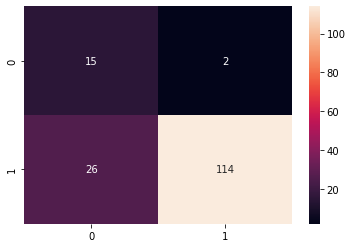

In [453]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

# predictions using the model
pred_test = cross_val_predict(model, X, y, cv=5)

# Calculate metrics
accuracy = accuracy_score(y, pred_test)
precision = precision_score(y, pred_test)
recall = recall_score(y, pred_test)
f1 = f1_score(y, pred_test)
conf_matrix = confusion_matrix(y, pred_test)

# Calculate mean  of metrics 
mean_accuracy = np.mean(accuracy)
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)

# DataFrame to display metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Mean': [mean_accuracy, mean_precision, mean_recall, mean_f1]
}
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print(metrics_df)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print(cf_matrix(best_model, y, pred_test))